# Homework3 - KNN Classifier
### by Mehdi Lotfipour

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Here "mixpdf" is defined that makes a dataset of "N" samples from some normal distribution with prior probabilities of "P" and means of "M" and covariance matrices of "S". Output is a dataset of size (N x (d+1)) that "d" is the dimension of feature vector. Last column is the index of distribution that coresponding record come from.

In [3]:
#make a dataset from a linear combination of 
#different gaussian distribution
def mixpdf(N, P, M, S):
    #inputs
    #N: number of data points
    #P: prior probability of distribution
    #M: means
    #S: covariances
    #output
    #return dataset: a dataset with N points from mixed pdf
    
    #helpful variables
    #d: dimension of features
    d = len(M[0])
    #class_labels: a list of possible classes
    class_labels = [class_label for class_label in range(len(P))]
    #labels: class of all records
    labels = np.random.choice(class_labels, size= N, p= P)
    #X: structure of dataset features init with zero
    X = np.zeros([N, d])
    for record in range(N):
        X[record] = np.random.multivariate_normal(M[labels[record]], S[labels[record]])
    
    #concatenating features and record labels to form a dataset
    dataset = np.concatenate((X, labels.reshape(-1, 1)), axis= 1)
    return dataset

## Computer Exercises 2.8

In this part we define "prediction_knn" function that recives labels of k-nearest points to a vector and all possible class types and return its prediction based on majority. Then we define "knn_classifier" function that takes: "Z" , "Z_label" that is training dataset and its coresponding labels. "k" parameter that is a user defined value for classifier and a dataset of "X" which we want to classify its records. For every record in dataset, the classifier calculate its distance from all train dataset points and choose "k" nearest points. Then it useus their label to predict the class of record.

In [4]:
#predict the class of interested vector
#based on k nearest neighbors
def prediction_knn(k_nearest_label, class_labels):
    #inputs
    #k_nearest_label: label of k nearest point
    #class_labels: labels of all classes
    #output
    #prediction: prediction of interested vector's class
    
    #num_class_samples[i]: number of neighbors that belongs to i'th class
    num_class_samples = []
    for class_label in class_labels:
        n_Ci = np.sum(k_nearest_label == class_label)
        num_class_samples.append(n_Ci)
    
    #class with maximum number is selected
    prediction = class_labels[np.argmax(num_class_samples)]
    return prediction


#classify a matrix of observation based on train dataset
#and user defined k parameter
def knn_classifier(Z, Z_label, k, X):
    #input
    #Z: matrix of size (d x N1)
    #Z_label: vector of size N1
    #k: user defined parameter of k
    #X: matrix of size (d x N)
    #output
    #X_label: vector of size N
    
    #helpful variable
    #N1: nember of record in train dataset
    N_1 = Z.shape[1]
    #N: nember of record in test dataset
    N = X.shape[1]
    #d: dimension of feature vector
    d = Z.shape[0]
    #class_labels: all possible labels
    class_labels = np.unique(Z_label)
    
    #structure of prediction labels
    X_label = np.zeros(N)
    for record in range(N):
        difference_mat = (Z - X[:, record].reshape(-1, 1)) ** 2
        #distance of record from all training data points
        distance_vec = np.sum(difference_mat, axis= 0)
        #choosing k nearest neighbors
        k_nearest_labels = (Z_label[np.argsort(distance_vec)])[:k]
        #predict the vlass of record
        X_label[record] = prediction_knn(k_nearest_labels, class_labels)
    #prediction vector of all test data points
    return X_label

## Computer Exercises 2.9

Here we define a function that receives the prediction label of test dataset and its true labels and return the error of classification.

In [5]:
#evaluate the error rate of a classifier by
#its prediction and real labels
def classifier_error(true_label, predicted_label):
    #inputs
    #true_label: real data points labels
    #predicted_label: labels that is made by classifier
    #output
    #error: error rate
        
    #error = number of misclassiication divided by total number of records
    error = (np.sum(true_label != predicted_label)) / true_label.shape[0]
    return error

## Computer Experiments 2.8

In this part we want to see the effect of "k" value on classification error rate. So we define two different condition (k = 1, k = 11) and classify the same dataset and get the error rate. We setup two dataset, one for training and one for test, both from same distribution. Training dataset is called "Z" and test dataset is "X_3". We first plot these two dataset to show their distribution.

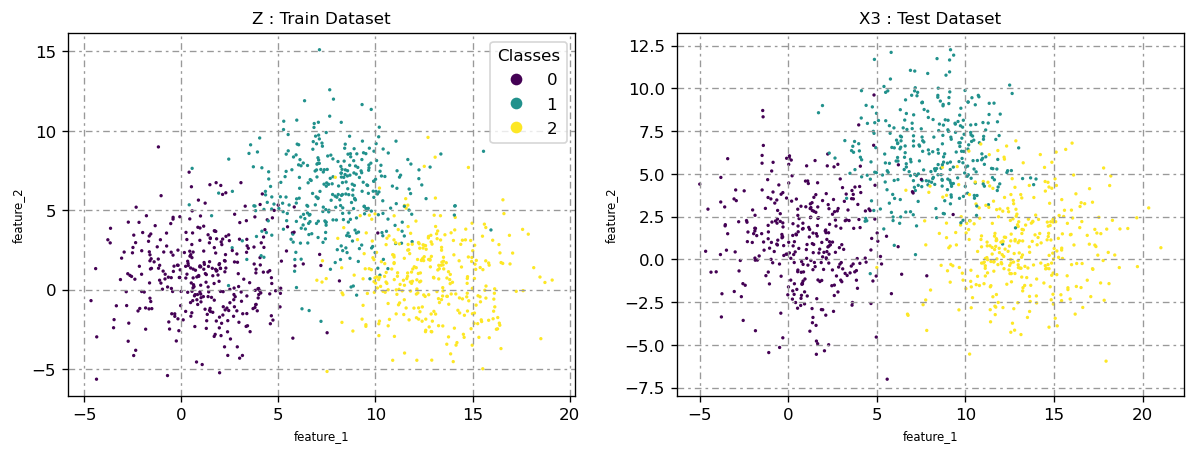

In [6]:
#parameters
#N: number of samples
N = 1000
#P: list of prior probability
P = [1/3, 1/3, 1/3]
#M: list of means
M = [[1, 1], [8, 6], [13, 1]]
#S: list of covariances
sigma = [[6, 0], [0, 6]]
S = [sigma, sigma, sigma]
#k_i: different k values
k_1 = 1
k_2 = 11


#making two pseudorandom generated dataset
#X_3: dataset for test
X_3 = mixpdf(N, P, M, S)
#Z: dataset for train
Z = mixpdf(N, P, M, S)
#modify structure
#label extraction
Z_label = Z.T[-1]
X_3_label = X_3.T[-1]
#column based dataset
Z = Z.T[:-1]
X_3 = X_3.T[:-1]


#plotting
#plot structure
fig, ax = plt.subplots(1, 2, dpi= 120, figsize= (12,4))
#data points
scatter = ax[0].scatter(Z[0], Z[1], c= Z_label, s= 1)
ax[1].scatter(X_3[0], X_3[1], c= X_3_label, s= 1)
#decision boundries
#details
ax[0].set_title(f'Z : Train Dataset', fontsize=10)
ax[1].set_title(f'X3 : Test Dataset', fontsize=10)
ax[0].set_xlabel('feature_1', fontsize= 7)
ax[1].set_xlabel('feature_1', fontsize= 7)
ax[0].set_ylabel('feature_2', fontsize= 7)
ax[1].set_ylabel('feature_2', fontsize= 7)
ax[0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax[0].legend(*scatter.legend_elements(), loc="best", title="Classes")

Now we apply the classifier two times with different "k" values and show the decision boundries on "xy" plane.

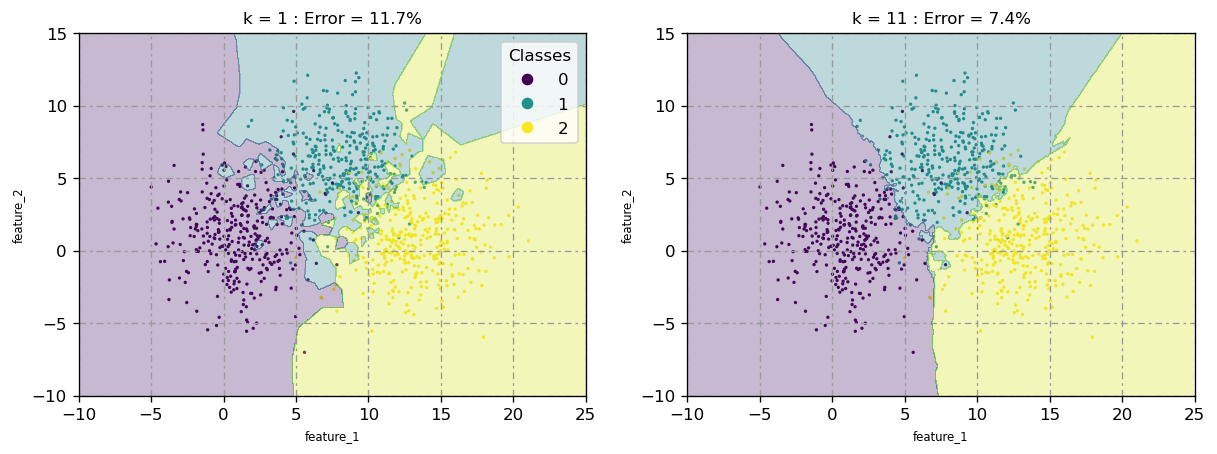

In [7]:
#applying classifier
#predicting...
predicted_label_k1 = knn_classifier(Z, Z_label, k_1, X_3)
predicted_label_k2 = knn_classifier(Z, Z_label, k_2, X_3)
#error evaluating...
error_k1 = classifier_error(X_3_label, predicted_label_k1)
error_k2 = classifier_error(X_3_label, predicted_label_k2)

#preparing mesh for showing boundries
#making mesh
x_min, x_max = -10, 25
y_min, y_max = -10, 15
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
grid_data = np.c_[xx.ravel(), yy.ravel()]
#applying classifiers on mesh grid
region_k1 = knn_classifier(Z, Z_label, k_1, grid_data.T).reshape(xx.shape)
region_k2 = knn_classifier(Z, Z_label, k_2, grid_data.T).reshape(xx.shape)


#plotting
#plot structure
fig, ax = plt.subplots(1, 2, dpi= 120, figsize= (12,4))
#data points
scatter = ax[0].scatter(X_3[0], X_3[1], c= X_3_label, s= 1)
ax[1].scatter(X_3[0], X_3[1], c= X_3_label, s= 1)
#decision boundries
ax[0].contourf(xx, yy, region_k1, alpha=0.3)
ax[1].contourf(xx, yy, region_k2, alpha=0.3)
#details
ax[0].set_xlim([x_min, x_max])
ax[1].set_xlim([x_min, x_max])
ax[0].set_ylim([y_min, y_max])
ax[1].set_ylim([y_min, y_max])
ax[0].set_title(f'k = {k_1} : Error = {round(error_k1 * 100, 2)}%', fontsize=10)
ax[1].set_title(f'k = {k_2} : Error = {round(error_k2 * 100, 2)}%', fontsize=10)
ax[0].set_xlabel('feature_1', fontsize= 7)
ax[1].set_xlabel('feature_1', fontsize= 7)
ax[0].set_ylabel('feature_2', fontsize= 7)
ax[1].set_ylabel('feature_2', fontsize= 7)
ax[0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax[0].legend(*scatter.legend_elements(), loc="best", title="Classes")

In this example we get a lower error rate with bigger "k" parameter. Smaller value of "k" cause misclassification in some small region of "xy" plane as a result of outlier points! But bigger value of "k" make the classifier more robust to outliers.